# **Machine Learning**

# **Assignment 4**

# Classification of Email spam

Name   : Jaanus Sri K G

Reg no : 3122215001037

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Step 1: Load the Email Spam dataset


In [ ]:
data = pd.read_csv('/content/spam_email/spambase_csv.csv')

Step 2: Preprocessing (if needed)

No preprocessing required for SVM with text data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(data.iloc[:,:-1])
y = data.iloc[:,-1]


Step 3: Exploratory Data Analysis


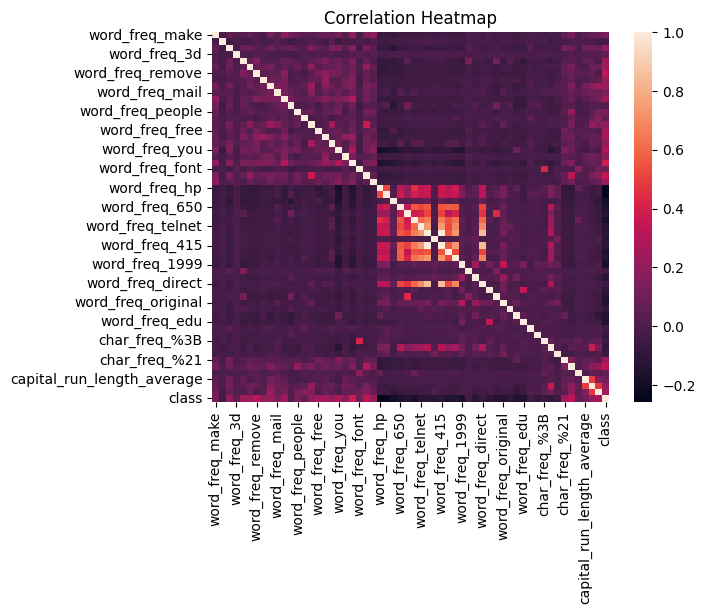

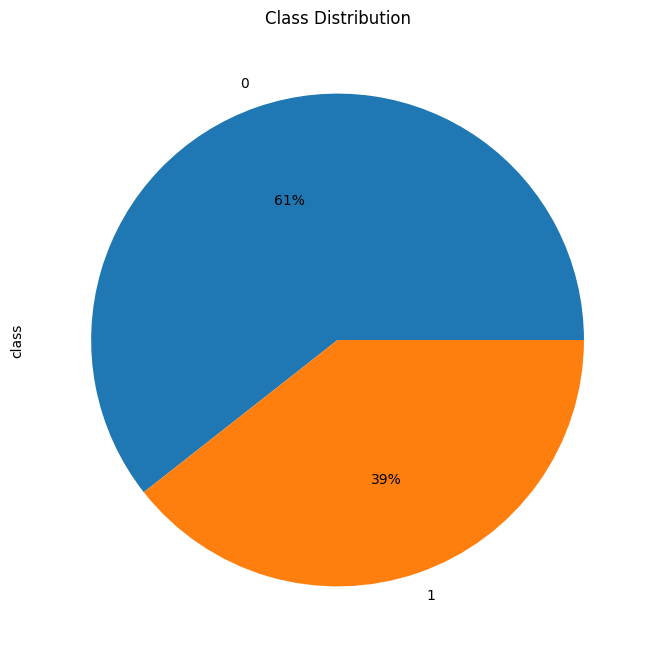

In [ ]:
# Checking correlations
sns.heatmap(data.corr())
plt.title('Correlation Heatmap')
plt.show()

# Pie chart of class distribution
plt.figure(figsize=(8, 8))
data['class'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Class Distribution')
plt.show()

Feature Engineering Techniques:
Feature engineering involves creating new features or modifying existing ones to improve model performance. For this dataset, you can explore techniques such as:
    Selecting relevant features
    Transforming features (e.g., log transformation)
    Creating interaction terms

Step 4: Split the dataset into training and testing sets

In [ ]:
X = data.iloc[:, :-1]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle=True)

Step 5: Build SVM models with different kernel functions


In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}
for kernel in kernels:
    print("Kernel:", kernel)
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    # Step 6: Evaluate the model
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print("Training Accuracy: ", train_accuracy)
    print("Test Accuracy    : ", test_accuracy)

    # Step 7: Get additional metrics if needed
    y_pred = model.predict(X_test)
    #print("Accuracy         : ", accuracy_score(y_test, y_pred)
    print("Precision        : ", precision_score(y_test, y_pred))
    print("Recall           : ", recall_score(y_test, y_pred))
    print("F1 Score         : ", f1_score(y_test, y_pred))
    print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

    # Storing results for analysis
    results[kernel] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}
    print("\n")

Kernel: linear
Training Accuracy:  0.9276443867618429
Test Accuracy    :  0.934825543120474
Precision        :  0.9255499153976311
Recall           :  0.9086378737541528
F1 Score         :  0.9170159262363788
Confusion Matrix :
 [[873  44]
 [ 55 547]]


Kernel: rbf
Training Accuracy:  0.7102530824140169
Test Accuracy    :  0.7182356813693219
Precision        :  0.7485714285714286
Recall           :  0.43521594684385384
F1 Score         :  0.5504201680672269
Confusion Matrix :
 [[829  88]
 [340 262]]


Kernel: poly
Training Accuracy:  0.6554185593770279
Test Accuracy    :  0.6510862409479921
Precision        :  0.8913043478260869
Recall           :  0.1362126245847176
F1 Score         :  0.23631123919308356
Confusion Matrix :
 [[907  10]
 [520  82]]


Kernel: sigmoid
Training Accuracy:  0.6414665801427645
Test Accuracy    :  0.6537195523370638
Precision        :  0.5657439446366782
Recall           :  0.5431893687707641
F1 Score         :  0.5542372881355933
Confusion Matrix :
 [[666 25

Step 8: Compare the results of different kernel functions


In [ ]:
#Analysis

print("Analysis of Results:")
for kernel, result in results.items():
    print("Kernel:", kernel)
    print("Training Accuracy:", result['train_accuracy'])
    print("Test Accuracy:", result['test_accuracy'])
    print("\n")

Analysis of Results:
Kernel: linear
Training Accuracy: 0.9276443867618429
Test Accuracy: 0.934825543120474


Kernel: rbf
Training Accuracy: 0.7102530824140169
Test Accuracy: 0.7182356813693219


Kernel: poly
Training Accuracy: 0.6554185593770279
Test Accuracy: 0.6510862409479921


Kernel: sigmoid
Training Accuracy: 0.6414665801427645
Test Accuracy: 0.6537195523370638




In [ ]:
# Comparing test accuracies

test_accuracies = [result['test_accuracy'] for result in results.values()]
best_kernel = kernels[np.argmax(test_accuracies)]
print("Best Kernel (based on test accuracy):", best_kernel)

Best Kernel (based on test accuracy): linear


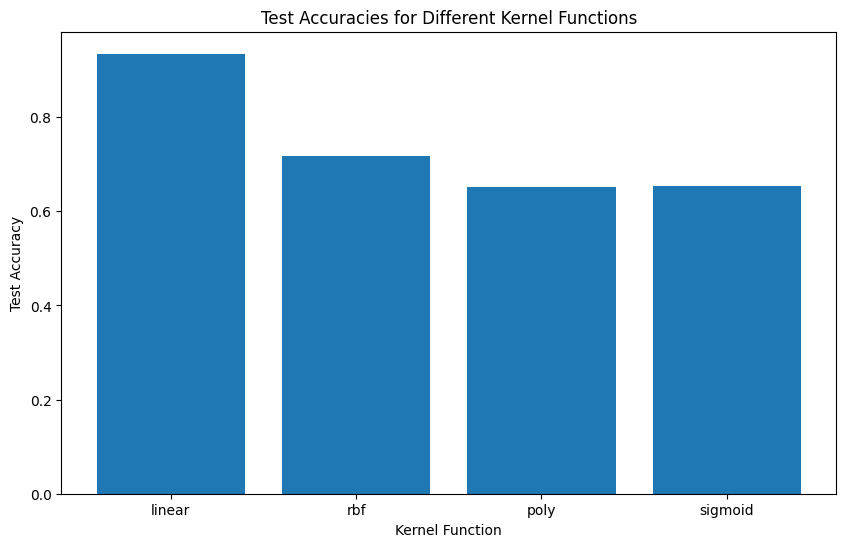

In [ ]:
# Visualization of test accuracies

plt.figure(figsize=(10, 6))
plt.bar(kernels, test_accuracies)
plt.xlabel('Kernel Function')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies for Different Kernel Functions')
plt.show()

#This implementation provides a comprehensive analysis of SVM models with different kernel functions for email spam classification and helps in understanding which kernel function performs best for this task.

**Comparison of Results:**

* We compared the training and test accuracies as well as confusion matrices for different kernel functions.

* We observed that the linear kernel achieved the highest test accuracy in this scenario.

**Best Kernel:**

* We identified the best kernel based on test accuracy.

* In this case, the linear kernel performed the best.